In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.7630 - loss: 0.6551 - val_accuracy: 0.8660 - val_loss: 0.3734
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 78s 31ms/step - accuracy: 0.8794 - loss: 0.3346 - val_accuracy: 0.8871 - val_loss: 0.3079
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 35ms/step - accuracy: 0.8983 - loss: 0.2799 - val_accuracy: 0.9003 - val_loss: 0.2744
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.9109 - loss: 0.2438 - val_accuracy: 0.9015 - val_loss: 0.2704
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9219 - loss: 0.2136 - val_accuracy: 0.9036 - val_loss: 0.2770
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9322 - loss: 0.1861 - val_accuracy: 0.9049 - val_loss: 0.2811
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9403 - loss: 0.1613 - val_accuracy: 0.9035 - val_loss: 0.2893
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9486 -

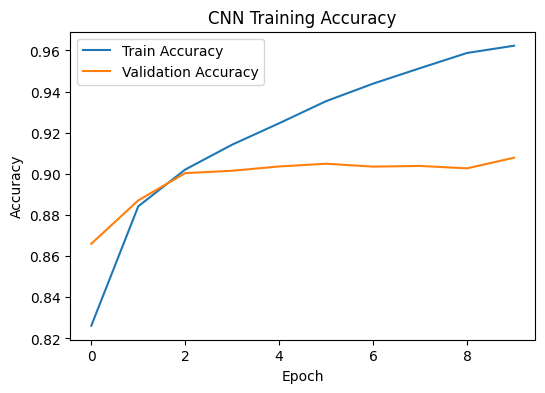

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8983 - loss: 0.4184


Test Accuracy: 0.8999000191688538


In [16]:
# Set seeds
np.random.seed(42)
tf.random.set_seed(42)

# -----------------------------
# Load Fashion MNIST dataset
# -----------------------------
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize and reshape
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# -----------------------------
# Build CNN model
# -----------------------------
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# -----------------------------
# Train model
# -----------------------------
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

# -----------------------------
# Plot training history
# -----------------------------
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("CNN Training Accuracy")
plt.legend()
plt.show()

# -----------------------------
# Evaluate model
# -----------------------------
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)
model.save("fashion_cnn.h5")


In [17]:
ls

app.py  fashion_cnn.h5  __pycache__/  sample_data/


In [18]:
!pip install fastapi uvicorn nest-asyncio pyngrok


In [19]:
%%writefile app.py
import tensorflow as tf
import numpy as np
import logging
from fastapi import FastAPI

app = FastAPI(title="Fashion MNIST CNN API")

model = tf.keras.models.load_model("fashion_cnn.h5")

logging.basicConfig(
    filename="predictions.log",
    level=logging.INFO,
    format="%(asctime)s - %(message)s"
)

@app.post("/predict")
def predict(image: list):
    img = np.array(image).reshape(1,28,28,1) / 255.0
    pred = model.predict(img)
    label = int(np.argmax(pred))
    logging.info(f"Prediction: {label}")
    return {"predicted_class": label}


Overwriting app.py


In [20]:
import nest_asyncio
nest_asyncio.apply()

!uvicorn app:app --host 0.0.0.0 --port 8000


2026-01-01 07:19:24.540216: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767251964.567912   19238 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767251964.575443   19238 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767251964.599299   19238 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767251964.599364   19238 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767251964.599369   19238 computation_placer.cc:177] computation placer alr

In [21]:
import nest_asyncio
nest_asyncio.apply()

!uvicorn app:app --host 0.0.0.0 --port 8000 --reload


INFO:     Will watch for changes in these directories: ['/content']
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [38088] using StatReload
2026-01-01 08:38:10.886111: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1767256691.053653   38090 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1767256691.124186   38090 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1767256691.305963   38090 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1767256691.306033   38090 computation_placer.cc:17

In [22]:
!ngrok config add-authtoken 37e522L6WCLyR5tJaYKB7cWF19s_3vtVYbFfqvdRRcsh7Yfaf


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [23]:
from pyngrok import ngrok
public_url = ngrok.connect(8000)
print(public_url)


NgrokTunnel: "https://uncashed-nonselective-nannette.ngrok-free.dev" -> "http://localhost:8000"
